# Prediction of Cast and Director in Movies by Social Network Analysis

**Name & Surname:** Mahsun ALTIN

**Number:** 504212507

In this notebook, one of the biggest movie databases, which is the IMDB (Internet Movie Database), is examined.

# **Requirements**

In [1]:
!pip install node2vec
!pip install gensim
!pip install networkx
!pip install matplotlib
!pip install wget
!pip install --upgrade numpy
!pip install gensim
!pip install --upgrade Interval
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=b9e2fcd14e104ac6b67b29787d67af234b4f51f4b5cbdd7b554006d63e6cd577
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=e15a2c1388991206477ef89181f1e52803450d8988e5cf705e7b0ac81161af23
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0/ddd93af16d5855dd9bad417623e70948fdac119d1d34fb17c8
Successfully built fst-pso miniful
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for Interval: filename=interval-1.0.0-py3-none-any.whl size=14269 sha256=374aacaf25b4ca467e108c32176e1234a62883c050ec545be00e812f272bee67
  Stored in directory: /root/.cache/pip/wheels/51/0a/ef/07d42e93689b84f008abfe78d01aaed1818f3447423769b27e
Successfully built Interval
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [2]:
!mkdir emb
!mkdir result

# **DATA COLLECTION**

## Edit MainData (title.principals)

In [1]:
import wget

wget.download('https://datasets.imdbws.com/title.principals.tsv.gz')
wget.download('https://datasets.imdbws.com/name.basics.tsv.gz')
wget.download('https://datasets.imdbws.com/title.basics.tsv.gz')

'title.basics.tsv.gz'

In [1]:
import pandas as pd

mainData = pd.read_csv('title.principals.tsv.gz', compression='gzip', header=0, sep='\t')
nameData = pd.read_csv('name.basics.tsv.gz', compression='gzip', sep='\t', header=0)
titleData = pd.read_csv('title.basics.tsv.gz', compression='gzip', sep='\t', header=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
mainData = mainData.merge(titleData, on='tconst', how='left')

In [3]:
mainData = mainData[(mainData.titleType == "movie")]
mainData = mainData.merge(nameData, on='nconst', how='left')

In [4]:
mainData = mainData[(mainData.deathYear == '\\N')]

In [5]:
del mainData['job']
del mainData['endYear']
del mainData['isAdult']
del mainData['originalTitle']
del mainData['characters']
del mainData['primaryProfession']
del mainData['knownForTitles']
mainData

,tconst,ordering,nconst,category,titleType,primaryTitle,startYear,runtimeMinutes,genres,primaryName,birthYear,deathYear
11,tt0000502,1,nm0215752,actor,movie,Bohemios,1905,100,\N,Antonio del Pozo,\N,\N
12,tt0000502,2,nm0252720,actor,movie,Bohemios,1905,100,\N,El Mochuelo,\N,\N
17,tt0000574,1,nm0846887,actress,movie,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",Elizabeth Tait,1879,\N
20,tt0000574,4,nm3002376,actor,movie,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",Norman Campbell,\N,\N
23,tt0000574,7,nm0425854,producer,movie,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",Millard Johnson,1871,\N
...,...,...,...,...,...,...,...,...,...,...,...,...
4459236,tt9916754,5,nm9272490,director,movie,Chico Albuquerque - Revelações,2013,49,Documentary,Angela Gurgel,\N,\N
4459237,tt9916754,6,nm8349149,director,movie,Chico Albuquerque - Revelações,2013,49,Documentary,Vinicius Augusto Bozzo,1985,\N
4459238,tt9916754,7,nm9272489,cinematographer,movie,Chico Albuquerque - Revelações,2013,49,Documentary,Marcelo Alves,\N,\N
4459239,tt9916754,8,nm10538638,cinematographer,movie,Chico Albuquerque - Revelações,2013,49,Documentary,Wellington Barros,\N,\N


In [6]:
### SAVE ###
#mainData.to_csv("/content/mainData.csv")

In [7]:
### READ ###
#mainData = pd.read_csv('mainData.csv', sep=',', header=0, index_col=0)
#del mainData['knownForTitles']
#mainData

In [8]:
# Replace miss data with 0 values.
mainData["startYear"] = mainData["startYear"].replace({"\\N": "0"})

## Cast and Director Data

**Note:** In this section we created each dataset. This is important to split all mainData above.

In [9]:
cast_director_data = mainData[(mainData.category == "actor") | (mainData.category == "actress") | (mainData.category == "director")]
#directorsData = mainData[(mainData.category == "director")]

len(cast_director_data)

1914823

In [10]:
cast_director_data = cast_director_data[(cast_director_data.startYear.astype(int) >= 2000)]
cast_director_data = cast_director_data[cast_director_data["genres"].str.contains("Action")]
len(cast_director_data)

106423

### Create List For Each Dataset

The future work will be on other datasets like train, test and validation datasets.

In [ ]:
groupData = cast_director_data.groupby('tconst')

listGroupData = list(groupData.groups)

In [ ]:
edgesList = []

In [ ]:
for eachMovie in listGroupData:
    oneGroup = groupData.get_group(eachMovie)
    if (oneGroup.category.str.contains(pat="actor").any() or oneGroup.category.str.contains(pat="actress").any()):
        if ((oneGroup.category.str.contains(pat="director").any())):
            for personIndex1, personRow1 in oneGroup.iterrows():
                checkValue1 = personRow1.category
                if(checkValue1 == "director"):
                    for personIndex2, personRow2 in oneGroup.iterrows():
                        checkValue2 = personRow2.category
                        if(checkValue2 == "actor" or checkValue2 == "actress"):
                            edgesList.append("d_" + personRow1.nconst + ",c_" + personRow2.nconst)

print(len(edgesList))

80373


In [ ]:
with open('general_network_links.txt', 'w') as f:
    for item in edgesList:
        f.write("%s\n" % item)

# **DATA PROCCESS**

## Necessary Libraries

In [29]:
import pandas as pd
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import gensim
import random
import numpy as np

## Create Network

In [25]:
edgesData = pd.read_csv('general_network_links.txt', sep=',', header=None)
edgesData.columns = ["director", "movie_star"]

counted = edgesData.groupby(edgesData.columns.tolist()).size().reset_index().\
    rename(columns={0:'weight'})

counted = counted.sort_values(by="weight")

print("General Dataset: " + str(len(counted)))

General Dataset: 75679


In [26]:
counted[:3]

,director,movie_star,weight
0,d_nm0000091,c_nm0000449,1
50048,d_nm3309599,c_nm5191929,1
50047,d_nm3309599,c_nm3286374,1


In [27]:
# Get them and upload to cosmograph
counted.to_csv('edgeslist.csv')
counted.director.to_csv('nodes_director.csv')
counted.movie_star.to_csv('nodes_movie_star.csv')

**Note:** We created bipartite and weighted network.

In [28]:
left_list = counted.director.to_list()
right_list = counted.movie_star.to_list()
weight_list = counted.weight.to_list()

with open('edgelist.txt', 'w') as f:
    for item1, item2, item3 in zip(left_list, right_list, weight_list):
        f.write(item1 + " " + item2 + " " + str(item3) + "\n")

with open('left.txt', 'w') as f:
    for item in left_list:
        f.write("%s\n" % item)

with open('right.txt', 'w') as f:
    for item in right_list:
        f.write("%s\n" % item)

In [29]:
left = [line.rstrip('\n') for line in open("left.txt")]
right = [line.rstrip('\n') for line in open("right.txt")]

left = list(set(left))
right = list(set(right))

print("Right: " + str(len(right)) + " Left: " + str(len(left)))

Right: 47173 Left: 12882


In [30]:
edge_list = [line.rstrip('\n') for line in open("edgelist.txt")]

a_list = []

for elem in edge_list:
    a_list.append(tuple(elem.split(" ")))

In [31]:
graph = nx.Graph()
graph.add_nodes_from(right, bipartite=0)
graph.add_nodes_from(left, bipartite=1)

[graph.add_edge(x, y, weight=int(z)) for x, y, z in a_list]

#print(nx.info(graph))
print("This network bipartite and weighted?")
print(nx.is_bipartite(graph))
print(nx.is_weighted(graph))

This network bipartite and weighted?
True
True


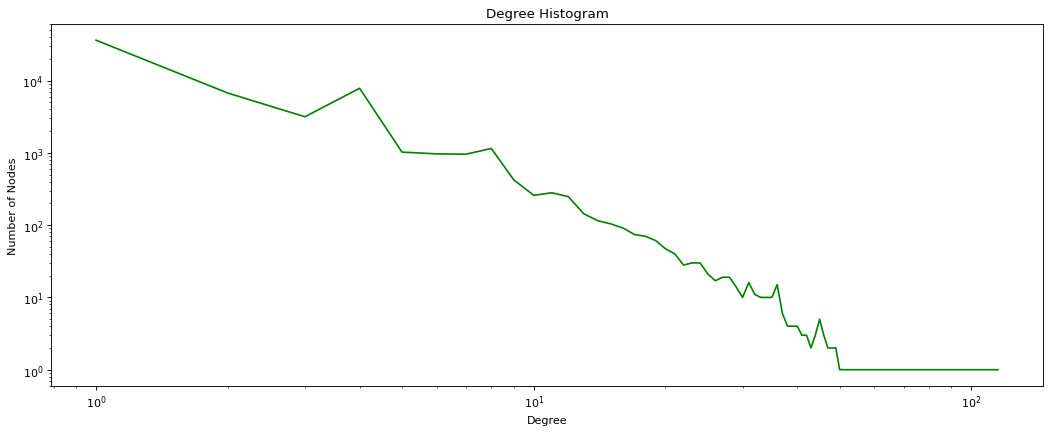

In [32]:
## degree distribution or degree histogram
from matplotlib.pyplot import figure

figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

def plot_degree_dist(graph):
    degrees = [val for (node, val) in graph.degree()]
    all_degrees=list(degrees)
    unique_degrees=list(set(all_degrees))

    count_degrees=[]
    for i in unique_degrees:
        x = all_degrees.count(i)
        count_degrees.append(x)
    plt.loglog(unique_degrees, count_degrees, color="green")
    plt.show()

    
plt.title("Degree Histogram")
plt.ylabel("Number of Nodes")    
plt.xlabel("Degree")

plot_degree_dist(graph)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Select two random nodes
nodes = random.sample(list(graph.nodes()), 10000)

# Select all edges incident to the nodes
edges = []
for node in nodes:
    edges.extend(list(graph.edges(node)))

# Create a subgraph containing the selected edges and the nodes they connect
subG = nx.Graph()
subG.add_edges_from(edges)

# Draw the subgraph
nx.draw(subG, with_labels=False, node_size=3)

# Show the plot
plt.show()

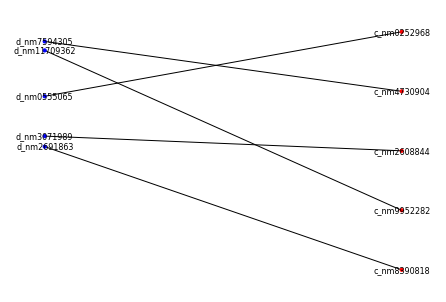

In [61]:
# Select a random node from one of the node sets
node_set = random.choice([list(graph.nodes()), list(graph.nodes())])
node = random.choice(node_set)

# Select all edges incident to the node
edges = graph.edges(node)

# Add the node and its incident edges to the subgraph
subG = nx.Graph()
subG.add_edges_from(edges)
subG.add_node(node)

# Repeat the process until the desired number of nodes is reached
num_nodes = 10  # Number of nodes to select
while subG.number_of_nodes() < num_nodes:
    # Select a random node from the graph that is not already in the subgraph
    node_set = random.choice([list(graph.nodes()), list(graph.nodes())])
    node = random.choice([n for n in node_set if n not in subG.nodes()])
    edges = graph.edges(node)
    subG.add_edges_from(edges)
    subG.add_node(node)

# Color the nodes in the subgraph according to their node sets
colors = []
for node in subG.nodes():
    if node in left:
        colors.append('blue')
    else:
        colors.append('red')

# Draw the subgraph
pos = nx.bipartite_layout(subG, left)
nx.draw(subG, pos, with_labels=True, font_size=8, node_color=colors, node_size=10)

# Show the plot
plt.show()

In [ ]:
### If you want to get visualization of graph, please run it. ###
### Because of insufficient hardware, it needs to be runned in better computers, or needs to be runned with smaller data.

import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

sp = nx.spring_layout(graph)

plt.axis("off")
plt.figure(figsize=(100,100))

nx.draw_networkx(graph, pos=sp, with_labels=False, node_size=1)

plt.savefig("general_plt.pdf")
nx.write_edgelist(graph, "edgesData.edgelist", data=['weight'])

#### Descriptive Info

In [39]:
# Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(graph)

# Find the node with the highest degree centrality
most_central_node = max(degree_centrality, key=degree_centrality.get)
print(f'The most central node is {most_central_node}')

The most central node is d_nm0757084


In [ ]:
### Because of insufficient hardware, it needs to be runned in better computers, or needs to be runned with smaller data.
# Calculate the centrality of each node
betweenness_centrality = nx.betweenness_centrality(graph)

# Find the node with the highest centrality
most_central_node = max(betweenness_centrality, key=betweenness_centrality.get)
print(f'The most central node is {most_central_node}')

In [ ]:
### Because of insufficient hardware, it needs to be runned in better computers, or needs to be runned with smaller data.
# Calculate the centrality of each node
closeness_centrality = nx.closeness_centrality(graph)

# Find the node with the highest centrality
most_central_node = max(closeness_centrality, key=closeness_centrality.get)
print(f'The most central node is {most_central_node}')

In [50]:
# Calculate the centrality of each node
eigenvector_centrality = nx.eigenvector_centrality(graph)

# Find the node with the highest centrality
most_central_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
print(f'The most central node is {most_central_node}')

The most central node is d_nm0700872


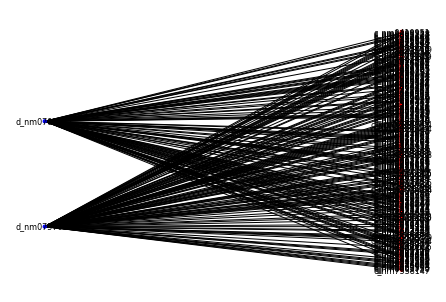

In [59]:
# Select a random node from one of the node sets
node_set = random.choice([list(graph.nodes()), list(graph.nodes())])
node = 'd_nm0700872' #Most central node

# Select all edges incident to the node
edges = graph.edges(node)

# Add the node and its incident edges to the subgraph
subG = nx.Graph()
subG.add_edges_from(edges)
subG.add_node(node)
 
# Add another most central node
node = 'd_nm0757084'
edges = graph.edges(node)
subG.add_edges_from(edges)
subG.add_node(node)

# Repeat the process until the desired number of nodes is reached
num_nodes = 3  # Number of nodes to select
while subG.number_of_nodes() < num_nodes:
    # Select a random node from the graph that is not already in the subgraph
    node_set = random.choice([list(graph.nodes()), list(graph.nodes())])
    node = random.choice([n for n in node_set if n not in subG.nodes()])
    edges = graph.edges(node)
    subG.add_edges_from(edges)
    subG.add_node(node)

# Color the nodes in the subgraph according to their node sets
colors = []
for node in subG.nodes():
    if node in left:
        colors.append('blue')
    else:
        colors.append('red')

# Draw the subgraph
pos = nx.bipartite_layout(subG, left)
nx.draw(subG, pos, with_labels=True, font_size=8, node_color=colors, node_size=10)

# Show the plot
plt.show()

- List of centrality nodes

In [ ]:
### Because of insufficient hardware, it needs to be runned in better computers, or needs to be runned with smaller data.

small_general_pgr = nx.pagerank(small_general_graph)
print(str(small_general_pgr))

In [ ]:
### Because of insufficient hardware, it needs to be runned in better computers, or needs to be runned with smaller data.

small_general_btw = nx.betweenness_centrality(small_general_graph)
print(str(small_general_btw))

In [ ]:
### Because of insufficient hardware, it needs to be runned in better computers, or needs to be runned with smaller data.

small_general_cls = nx.closeness_centrality(small_general_graph)
print(str(small_general_cls))

# Prediction Studies of Links

## Split MainData To Train, Val and Test

This will be applied in the future works.

In [12]:
cast_director_data = mainData[(mainData.category == "actor") | (mainData.category == "actress") | (mainData.category == "director")]

cast_director_data = cast_director_data[(cast_director_data.startYear.astype(int) >= 2000)]
cast_director_data = cast_director_data[cast_director_data["genres"].str.contains("Action")]

len(cast_director_data)

106423

In [13]:
trainData                = cast_director_data[(cast_director_data.startYear.astype(int) <= 2010) & (cast_director_data.startYear.astype(int) >= 2000)]
trainDependentSeenData   = cast_director_data[(cast_director_data.startYear.astype(int) <= 2015) & (cast_director_data.startYear.astype(int) >= 2011)]
testData                 = cast_director_data[(cast_director_data.startYear.astype(int) <= 2018) & (cast_director_data.startYear.astype(int) >= 2008)]
testDependentSeenData    = cast_director_data[(cast_director_data.startYear.astype(int) <= 2022) & (cast_director_data.startYear.astype(int) >= 2019)]

# Create false and true edges; AND Networkx graphs and Their embeddings

In [14]:
###############################################################################
###############################################################################
### TRAIN
###############################################################################
###############################################################################

groupData = trainData.groupby('tconst')

listGroupData = list(groupData.groups)

edgesList = []

for eachMovie in listGroupData:
    oneGroup = groupData.get_group(eachMovie)
    if (oneGroup.category.str.contains(pat="actor").any() or oneGroup.category.str.contains(pat="actress").any()):
        if ((oneGroup.category.str.contains(pat="director").any())):
            for personIndex1, personRow1 in oneGroup.iterrows():
                checkValue1 = personRow1.category
                if(checkValue1 == "director"):
                    for personIndex2, personRow2 in oneGroup.iterrows():
                        checkValue2 = personRow2.category
                        if(checkValue2 == "actor" or checkValue2 == "actress"):
                            edgesList.append("d_" + personRow1.nconst + ",c_" + personRow2.nconst)

print(len(edgesList))

with open('train_edges_network_links.txt', 'w') as f:
    for item in edgesList:
        f.write("%s\n" % item)

25078


In [16]:
edgesData = pd.read_csv('train_edges_network_links.txt', sep=',', header=None)
edgesData.columns = ["director", "movie_star"]

counted = edgesData.groupby(edgesData.columns.tolist()).size().reset_index().\
    rename(columns={0:'weight'})

counted = counted.sort_values(by="weight")

print("General Dataset: " + str(len(counted)))

left_list = counted.director.to_list()
right_list = counted.movie_star.to_list()
weight_list = counted.weight.to_list()

with open('edgelist.txt', 'w') as f:
    for item1, item2, item3 in zip(left_list, right_list, weight_list):
        f.write(item1 + " " + item2 + " " + str(item3) + "\n")

with open('left.txt', 'w') as f:
    for item in left_list:
        f.write("%s\n" % item)

with open('right.txt', 'w') as f:
    for item in right_list:
        f.write("%s\n" % item)
        
left = [line.rstrip('\n') for line in open("left.txt")]
right = [line.rstrip('\n') for line in open("right.txt")]

left = list(set(left))
right = list(set(right))

print("Right: " + str(len(right)) + " Left: " + str(len(left)))

edge_list = [line.rstrip('\n') for line in open("edgelist.txt")]

a_list = []

for elem in edge_list:
    a_list.append(tuple(elem.split(" ")))
    
graph = nx.Graph()
graph.add_nodes_from(right, bipartite=0)
graph.add_nodes_from(left, bipartite=1)

[graph.add_edge(x, y, weight=int(z)) for x, y, z in a_list]

print(nx.info(graph))
print("This network bipartite and weighted?")
print(nx.is_bipartite(graph))
print(nx.is_weighted(graph))

graph_nodes = []
gen_graph_links = []
     

counter = 0
while(counter < 10000):
  graph_nodes = []
  right_elem = random.choice(right)
  left_elem = random.choice(left)
  if(graph.has_edge(left_elem, right_elem) == False):
    graph_nodes.append(right_elem)
    graph_nodes.append(left_elem)
    if not graph_nodes in gen_graph_links:
        counter = counter + 1
        gen_graph_links.append(graph_nodes)
     

with open('train_edges_network_links_false.txt', 'w') as f:
    for item in gen_graph_links:
        f.write("%s\n" % item)

General Dataset: 23717
Right: 15302 Left: 4330


<ipython-input-16-a4fa4c37bc87>:48: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


Graph with 19632 nodes and 23717 edges
This network bipartite and weighted?
True
True


In [17]:
from node2vec import Node2Vec

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph, dimensions=6, walk_length=10, num_walks=3, workers=2, weight_key="weight")  # Use temp_folder for big graphs

# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

EMBEDDING_FILENAME = 'emb/train_embeddings.emb'
EMBEDDING_MODEL_FILENAME = 'emb/train_embeddings.model'

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

Computing transition probabilities:   0%|          | 0/19632 [00:00<?, ?it/s]

In [18]:
###############################################################################
###############################################################################
### TRAIN DEPENDENT SEEN
###############################################################################
###############################################################################

groupData = trainDependentSeenData.groupby('tconst')

listGroupData = list(groupData.groups)

edgesList = []

for eachMovie in listGroupData:
    oneGroup = groupData.get_group(eachMovie)
    if (oneGroup.category.str.contains(pat="actor").any() or oneGroup.category.str.contains(pat="actress").any()):
        if ((oneGroup.category.str.contains(pat="director").any())):
            for personIndex1, personRow1 in oneGroup.iterrows():
                checkValue1 = personRow1.category
                if(checkValue1 == "director"):
                    for personIndex2, personRow2 in oneGroup.iterrows():
                        checkValue2 = personRow2.category
                        if(checkValue2 == "actor" or checkValue2 == "actress"):
                            edgesList.append("d_" + personRow1.nconst + ",c_" + personRow2.nconst)

print(len(edgesList))

with open('train_dependent_seen_edges_network_links.txt', 'w') as f:
    for item in edgesList:
        f.write("%s\n" % item)

20295


In [19]:
edgesData = pd.read_csv('train_dependent_seen_edges_network_links.txt', sep=',', header=None)
edgesData.columns = ["director", "movie_star"]

counted = edgesData.groupby(edgesData.columns.tolist()).size().reset_index().\
    rename(columns={0:'weight'})

counted = counted.sort_values(by="weight")

print("General Dataset: " + str(len(counted)))

left_list = counted.director.to_list()
right_list = counted.movie_star.to_list()
weight_list = counted.weight.to_list()

with open('edgelist.txt', 'w') as f:
    for item1, item2, item3 in zip(left_list, right_list, weight_list):
        f.write(item1 + " " + item2 + " " + str(item3) + "\n")

with open('left.txt', 'w') as f:
    for item in left_list:
        f.write("%s\n" % item)

with open('right.txt', 'w') as f:
    for item in right_list:
        f.write("%s\n" % item)
        
left = [line.rstrip('\n') for line in open("left.txt")]
right = [line.rstrip('\n') for line in open("right.txt")]

left = list(set(left))
right = list(set(right))

print("Right: " + str(len(right)) + " Left: " + str(len(left)))

edge_list = [line.rstrip('\n') for line in open("edgelist.txt")]

a_list = []

for elem in edge_list:
    a_list.append(tuple(elem.split(" ")))
    
graph = nx.Graph()
graph.add_nodes_from(right, bipartite=0)
graph.add_nodes_from(left, bipartite=1)

[graph.add_edge(x, y, weight=int(z)) for x, y, z in a_list]

print(nx.info(graph))
print("This network bipartite and weighted?")
print(nx.is_bipartite(graph))
print(nx.is_weighted(graph))

graph_nodes = []
gen_graph_links = []
     

counter = 0
while(counter < 10000):
  graph_nodes = []
  right_elem = random.choice(right)
  left_elem = random.choice(left)
  if(graph.has_edge(left_elem, right_elem) == False):
    graph_nodes.append(right_elem)
    graph_nodes.append(left_elem)
    if not graph_nodes in gen_graph_links:
        counter = counter + 1
        gen_graph_links.append(graph_nodes)
     

with open('train_dependent_seen_edges_network_links_false.txt', 'w') as f:
    for item in gen_graph_links:
        f.write("%s\n" % item)

General Dataset: 19665
Right: 14580 Left: 4024


<ipython-input-19-a1feda961eed>:48: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


Graph with 18604 nodes and 19665 edges
This network bipartite and weighted?
True
True


In [20]:
from node2vec import Node2Vec

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph, dimensions=6, walk_length=10, num_walks=3, workers=2, weight_key="weight")  # Use temp_folder for big graphs

# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

EMBEDDING_FILENAME = 'emb/train_dependent_seen_embeddings.emb'
EMBEDDING_MODEL_FILENAME = 'emb/train_dependent_seen_embeddings.model'

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

Computing transition probabilities:   0%|          | 0/18604 [00:00<?, ?it/s]

In [21]:
###############################################################################
###############################################################################
### TEST
###############################################################################
###############################################################################

groupData = testData.groupby('tconst')

listGroupData = list(groupData.groups)

edgesList = []

for eachMovie in listGroupData:
    oneGroup = groupData.get_group(eachMovie)
    if (oneGroup.category.str.contains(pat="actor").any() or oneGroup.category.str.contains(pat="actress").any()):
        if ((oneGroup.category.str.contains(pat="director").any())):
            for personIndex1, personRow1 in oneGroup.iterrows():
                checkValue1 = personRow1.category
                if(checkValue1 == "director"):
                    for personIndex2, personRow2 in oneGroup.iterrows():
                        checkValue2 = personRow2.category
                        if(checkValue2 == "actor" or checkValue2 == "actress"):
                            edgesList.append("d_" + personRow1.nconst + ",c_" + personRow2.nconst)

print(len(edgesList))

with open('test_edges_network_links.txt', 'w') as f:
    for item in edgesList:
        f.write("%s\n" % item)

44714


In [22]:
edgesData = pd.read_csv('test_edges_network_links.txt', sep=',', header=None)
edgesData.columns = ["director", "movie_star"]

counted = edgesData.groupby(edgesData.columns.tolist()).size().reset_index().\
    rename(columns={0:'weight'})

counted = counted.sort_values(by="weight")

print("General Dataset: " + str(len(counted)))

left_list = counted.director.to_list()
right_list = counted.movie_star.to_list()
weight_list = counted.weight.to_list()

with open('edgelist.txt', 'w') as f:
    for item1, item2, item3 in zip(left_list, right_list, weight_list):
        f.write(item1 + " " + item2 + " " + str(item3) + "\n")

with open('left.txt', 'w') as f:
    for item in left_list:
        f.write("%s\n" % item)

with open('right.txt', 'w') as f:
    for item in right_list:
        f.write("%s\n" % item)
        
left = [line.rstrip('\n') for line in open("left.txt")]
right = [line.rstrip('\n') for line in open("right.txt")]

left = list(set(left))
right = list(set(right))

print("Right: " + str(len(right)) + " Left: " + str(len(left)))

edge_list = [line.rstrip('\n') for line in open("edgelist.txt")]

a_list = []

for elem in edge_list:
    a_list.append(tuple(elem.split(" ")))
    
graph = nx.Graph()
graph.add_nodes_from(right, bipartite=0)
graph.add_nodes_from(left, bipartite=1)

[graph.add_edge(x, y, weight=int(z)) for x, y, z in a_list]

print(nx.info(graph))
print("This network bipartite and weighted?")
print(nx.is_bipartite(graph))
print(nx.is_weighted(graph))

graph_nodes = []
gen_graph_links = []
     

counter = 0
while(counter < 10000):
  graph_nodes = []
  right_elem = random.choice(right)
  left_elem = random.choice(left)
  if(graph.has_edge(left_elem, right_elem) == False):
    graph_nodes.append(right_elem)
    graph_nodes.append(left_elem)
    if not graph_nodes in gen_graph_links:
        counter = counter + 1
        gen_graph_links.append(graph_nodes)
     

with open('test_edges_network_links_false.txt', 'w') as f:
    for item in gen_graph_links:
        f.write("%s\n" % item)

General Dataset: 42730
Right: 29107 Left: 7964


<ipython-input-22-0b7cc22f5f3a>:48: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


Graph with 37071 nodes and 42730 edges
This network bipartite and weighted?
True
True


In [23]:
from node2vec import Node2Vec

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph, dimensions=6, walk_length=10, num_walks=3, workers=2, weight_key="weight")  # Use temp_folder for big graphs

# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

EMBEDDING_FILENAME = 'emb/test_embeddings.emb'
EMBEDDING_MODEL_FILENAME = 'emb/test_embeddings.model'

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

Computing transition probabilities:   0%|          | 0/37071 [00:00<?, ?it/s]

In [24]:
###############################################################################
###############################################################################
### TEST DEPENDENT SEEN
###############################################################################
###############################################################################

groupData = testDependentSeenData.groupby('tconst')

listGroupData = list(groupData.groups)

edgesList = []

for eachMovie in listGroupData:
    oneGroup = groupData.get_group(eachMovie)
    if (oneGroup.category.str.contains(pat="actor").any() or oneGroup.category.str.contains(pat="actress").any()):
        if ((oneGroup.category.str.contains(pat="director").any())):
            for personIndex1, personRow1 in oneGroup.iterrows():
                checkValue1 = personRow1.category
                if(checkValue1 == "director"):
                    for personIndex2, personRow2 in oneGroup.iterrows():
                        checkValue2 = personRow2.category
                        if(checkValue2 == "actor" or checkValue2 == "actress"):
                            edgesList.append("d_" + personRow1.nconst + ",c_" + personRow2.nconst)

print(len(edgesList))

with open('test_dependent_seen_edges_network_links.txt', 'w') as f:
    for item in edgesList:
        f.write("%s\n" % item)

18232


In [25]:
edgesData = pd.read_csv('test_dependent_seen_edges_network_links.txt', sep=',', header=None)
edgesData.columns = ["director", "movie_star"]

counted = edgesData.groupby(edgesData.columns.tolist()).size().reset_index().\
    rename(columns={0:'weight'})

counted = counted.sort_values(by="weight")

print("General Dataset: " + str(len(counted)))

left_list = counted.director.to_list()
right_list = counted.movie_star.to_list()
weight_list = counted.weight.to_list()

with open('edgelist.txt', 'w') as f:
    for item1, item2, item3 in zip(left_list, right_list, weight_list):
        f.write(item1 + " " + item2 + " " + str(item3) + "\n")

with open('left.txt', 'w') as f:
    for item in left_list:
        f.write("%s\n" % item)

with open('right.txt', 'w') as f:
    for item in right_list:
        f.write("%s\n" % item)
        
left = [line.rstrip('\n') for line in open("left.txt")]
right = [line.rstrip('\n') for line in open("right.txt")]

left = list(set(left))
right = list(set(right))

print("Right: " + str(len(right)) + " Left: " + str(len(left)))

edge_list = [line.rstrip('\n') for line in open("edgelist.txt")]

a_list = []

for elem in edge_list:
    a_list.append(tuple(elem.split(" ")))
    
graph = nx.Graph()
graph.add_nodes_from(right, bipartite=0)
graph.add_nodes_from(left, bipartite=1)

[graph.add_edge(x, y, weight=int(z)) for x, y, z in a_list]

print(nx.info(graph))
print("This network bipartite and weighted?")
print(nx.is_bipartite(graph))
print(nx.is_weighted(graph))

graph_nodes = []
gen_graph_links = []
     

counter = 0
while(counter < 10000):
  graph_nodes = []
  right_elem = random.choice(right)
  left_elem = random.choice(left)
  if(graph.has_edge(left_elem, right_elem) == False):
    graph_nodes.append(right_elem)
    graph_nodes.append(left_elem)
    if not graph_nodes in gen_graph_links:
        counter = counter + 1
        gen_graph_links.append(graph_nodes)
     

with open('test_dependent_seen_edges_network_links_false.txt', 'w') as f:
    for item in gen_graph_links:
        f.write("%s\n" % item)

General Dataset: 17660
Right: 13624 Left: 3601
Graph with 17225 nodes and 17660 edges
This network bipartite and weighted?


<ipython-input-25-4d148158595b>:48: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


True
True


In [26]:
from node2vec import Node2Vec

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph, dimensions=6, walk_length=10, num_walks=3, workers=2, weight_key="weight")  # Use temp_folder for big graphs

# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

EMBEDDING_FILENAME = 'emb/test_dependent_seen_embeddings.emb'
EMBEDDING_MODEL_FILENAME = 'emb/test_dependent_seen_embeddings.model'

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

Computing transition probabilities:   0%|          | 0/17225 [00:00<?, ?it/s]

# Create dataset

In [27]:
import ast

In [37]:
#For True Labels

node_emb = pd.read_csv('/content/emb/train_embeddings.emb', sep=' ', header = None, skiprows=1)
node_emb = node_emb.rename(columns = {0:'director'})

edgesData_test = pd.read_csv('/content/train_edges_network_links.txt', sep=',', header=None)
edgesData_test.columns = ["director", "movie_star"]

counted_links_true = edgesData_test.groupby(edgesData_test.columns.tolist()).size().reset_index().\
    rename(columns={0:'weight'})

counted_links_true = counted_links_true.sort_values(by="weight")
del counted_links_true['weight']

counted_links_true = counted_links_true.merge(node_emb, on='director', how='left')
counted_links_true = counted_links_true[np.isfinite(counted_links_true[1])]
     

node_emb = pd.read_csv('/content/emb/train_embeddings.emb', sep=' ', header = None, skiprows=1)
node_emb = node_emb.rename(columns = {0:'movie_star'})
counted_links_true = counted_links_true.merge(node_emb, on='movie_star', how='left')
counted_links_true = counted_links_true[np.isfinite(counted_links_true["1_y"])]
counted_links_true['1'] = counted_links_true['1_x'] - counted_links_true['1_y']
counted_links_true['2'] = counted_links_true['2_x'] - counted_links_true['2_y']
counted_links_true['3'] = counted_links_true['3_x'] - counted_links_true['3_y']
counted_links_true['4'] = counted_links_true['4_x'] - counted_links_true['4_y']
counted_links_true['5'] = counted_links_true['5_x'] - counted_links_true['5_y']
counted_links_true['6'] = counted_links_true['6_x'] - counted_links_true['6_y']


del counted_links_true['1_x']
del counted_links_true['1_y']
del counted_links_true['2_x']
del counted_links_true['2_y']
del counted_links_true['3_x']
del counted_links_true['3_y']
del counted_links_true['4_x']
del counted_links_true['4_y']
del counted_links_true['5_x']
del counted_links_true['5_y']
del counted_links_true['6_x']
del counted_links_true['6_y']

counted_links_true['Y'] = True

#For False Labels

node_emb = pd.read_csv('/content/emb/train_embeddings.emb', sep=' ', header = None, skiprows=1)
node_emb = node_emb.rename(columns = {0:'director'})

new_list = [line.rstrip('\n') for line in open("/content/train_edges_network_links_false.txt")]
gen_graph_links = []

for element in new_list:
  gen_graph_links.append(ast.literal_eval(element))

len(gen_graph_links)
     

counted_links_false = pd.DataFrame.from_records(gen_graph_links)
counted_links_false.columns = ["director", "movie_star"]

counted_links_false = counted_links_false.merge(node_emb, on='director', how='left')
counted_links_false = counted_links_false[np.isfinite(counted_links_false[1])]
     

node_emb = pd.read_csv('/content/emb/train_embeddings.emb', sep=' ', header = None, skiprows=1)
node_emb = node_emb.rename(columns = {0:'movie_star'})
counted_links_false = counted_links_false.merge(node_emb, on='movie_star', how='left')
counted_links_false = counted_links_false[np.isfinite(counted_links_false["1_y"])]
counted_links_false['1'] = counted_links_false['1_x'] - counted_links_false['1_y']
counted_links_false['2'] = counted_links_false['2_x'] - counted_links_false['2_y']
counted_links_false['3'] = counted_links_false['3_x'] - counted_links_false['3_y']
counted_links_false['4'] = counted_links_false['4_x'] - counted_links_false['4_y']
counted_links_false['5'] = counted_links_false['5_x'] - counted_links_false['5_y']
counted_links_false['6'] = counted_links_false['6_x'] - counted_links_false['6_y']


del counted_links_false['1_x']
del counted_links_false['1_y']
del counted_links_false['2_x']
del counted_links_false['2_y']
del counted_links_false['3_x']
del counted_links_false['3_y']
del counted_links_false['4_x']
del counted_links_false['4_y']
del counted_links_false['5_x']
del counted_links_false['5_y']
del counted_links_false['6_x']
del counted_links_false['6_y']

counted_links_false['Y'] = False

train = pd.concat([counted_links_true, counted_links_false])
train.to_csv("train.csv")

In [38]:
train

,director,movie_star,1,2,3,4,5,6,Y
0,d_nm0000091,c_nm0000449,-0.527472,-0.945318,-1.458488,-1.383765,0.931323,0.360546,True
1,d_nm1796477,c_nm0460037,-0.988247,0.305819,-0.549546,0.859755,0.367729,0.679583,True
2,d_nm1796477,c_nm0023553,-0.906265,0.230913,-0.395650,0.720345,0.297104,0.640179,True
3,d_nm1792707,c_nm1795577,-1.300174,0.659857,-0.384179,-0.697612,-0.588430,0.508462,True
4,d_nm1792707,c_nm1792920,-1.311182,0.605399,-0.393693,-0.713478,-0.583735,0.533139,True
...,...,...,...,...,...,...,...,...,...
9995,c_nm2681362,d_nm0004915,-1.585595,-1.900183,2.732309,2.146351,-1.193271,-0.288004,False
9996,c_nm0498488,d_nm1196102,-0.429313,-3.059219,-1.451231,0.074083,0.200281,-3.529691,False
9997,c_nm1392076,d_nm2781113,-1.510585,-2.111490,-0.516887,0.847463,-1.700178,-2.247956,False
9998,c_nm0369513,d_nm3708253,0.443970,-1.333238,0.197523,-1.933675,-3.202692,-1.642955,False


In [39]:
#For True Labels

node_emb = pd.read_csv('/content/emb/train_dependent_seen_embeddings.emb', sep=' ', header = None, skiprows=1)
node_emb = node_emb.rename(columns = {0:'director'})

edgesData_test = pd.read_csv('/content/train_dependent_seen_edges_network_links.txt', sep=',', header=None)
edgesData_test.columns = ["director", "movie_star"]

counted_links_true = edgesData_test.groupby(edgesData_test.columns.tolist()).size().reset_index().\
    rename(columns={0:'weight'})

counted_links_true = counted_links_true.sort_values(by="weight")
del counted_links_true['weight']

counted_links_true = counted_links_true.merge(node_emb, on='director', how='left')
counted_links_true = counted_links_true[np.isfinite(counted_links_true[1])]
     

node_emb = pd.read_csv('/content/emb/train_dependent_seen_embeddings.emb', sep=' ', header = None, skiprows=1)
node_emb = node_emb.rename(columns = {0:'movie_star'})
counted_links_true = counted_links_true.merge(node_emb, on='movie_star', how='left')
counted_links_true = counted_links_true[np.isfinite(counted_links_true["1_y"])]
counted_links_true['1'] = counted_links_true['1_x'] - counted_links_true['1_y']
counted_links_true['2'] = counted_links_true['2_x'] - counted_links_true['2_y']
counted_links_true['3'] = counted_links_true['3_x'] - counted_links_true['3_y']
counted_links_true['4'] = counted_links_true['4_x'] - counted_links_true['4_y']
counted_links_true['5'] = counted_links_true['5_x'] - counted_links_true['5_y']
counted_links_true['6'] = counted_links_true['6_x'] - counted_links_true['6_y']


del counted_links_true['1_x']
del counted_links_true['1_y']
del counted_links_true['2_x']
del counted_links_true['2_y']
del counted_links_true['3_x']
del counted_links_true['3_y']
del counted_links_true['4_x']
del counted_links_true['4_y']
del counted_links_true['5_x']
del counted_links_true['5_y']
del counted_links_true['6_x']
del counted_links_true['6_y']

counted_links_true['Y'] = True

#For False Labels

node_emb = pd.read_csv('/content/emb/train_dependent_seen_embeddings.emb', sep=' ', header = None, skiprows=1)
node_emb = node_emb.rename(columns = {0:'director'})

new_list = [line.rstrip('\n') for line in open("/content/train_dependent_seen_edges_network_links_false.txt")]
gen_graph_links = []

for element in new_list:
  gen_graph_links.append(ast.literal_eval(element))

len(gen_graph_links)
     

counted_links_false = pd.DataFrame.from_records(gen_graph_links)
counted_links_false.columns = ["director", "movie_star"]

counted_links_false = counted_links_false.merge(node_emb, on='director', how='left')
counted_links_false = counted_links_false[np.isfinite(counted_links_false[1])]
     

node_emb = pd.read_csv('/content/emb/train_dependent_seen_embeddings.emb', sep=' ', header = None, skiprows=1)
node_emb = node_emb.rename(columns = {0:'movie_star'})
counted_links_false = counted_links_false.merge(node_emb, on='movie_star', how='left')
counted_links_false = counted_links_false[np.isfinite(counted_links_false["1_y"])]
counted_links_false['1'] = counted_links_false['1_x'] - counted_links_false['1_y']
counted_links_false['2'] = counted_links_false['2_x'] - counted_links_false['2_y']
counted_links_false['3'] = counted_links_false['3_x'] - counted_links_false['3_y']
counted_links_false['4'] = counted_links_false['4_x'] - counted_links_false['4_y']
counted_links_false['5'] = counted_links_false['5_x'] - counted_links_false['5_y']
counted_links_false['6'] = counted_links_false['6_x'] - counted_links_false['6_y']


del counted_links_false['1_x']
del counted_links_false['1_y']
del counted_links_false['2_x']
del counted_links_false['2_y']
del counted_links_false['3_x']
del counted_links_false['3_y']
del counted_links_false['4_x']
del counted_links_false['4_y']
del counted_links_false['5_x']
del counted_links_false['5_y']
del counted_links_false['6_x']
del counted_links_false['6_y']

counted_links_false['Y'] = False

test = pd.concat([counted_links_true, counted_links_false])
test.to_csv("test.csv")

In [40]:
test

,director,movie_star,1,2,3,4,5,6,Y
0,d_nm0000108,c_nm0000151,-0.783380,0.240543,-0.343397,0.234359,-0.076019,0.447412,True
1,d_nm4029428,c_nm5167146,-1.127972,0.600274,-0.419049,-0.487430,0.468580,0.182966,True
2,d_nm4029428,c_nm4289038,-1.885895,1.018663,-0.603495,-0.752132,0.773187,0.252787,True
3,d_nm4029428,c_nm4028680,-2.004260,1.137642,-0.694293,-0.765735,0.777655,0.354427,True
4,d_nm4029428,c_nm1395817,-1.585731,0.805332,-0.611246,-0.662079,0.616733,0.303020,True
...,...,...,...,...,...,...,...,...,...
9995,c_nm1194663,d_nm4579435,2.063507,-2.626084,-2.138991,-0.526139,-1.709153,1.132385,False
9996,c_nm1846544,d_nm3943930,1.170975,-1.900871,-1.072854,4.390075,-0.592978,-1.641216,False
9997,c_nm7701995,d_nm1498874,2.813074,-2.919632,1.619685,-0.495259,2.213256,-1.126182,False
9998,c_nm11726777,d_nm4755154,0.314743,0.102844,-1.498833,0.197580,-2.521116,0.280846,False


# Create Test and Train Datasets

In [42]:
result_df_train = pd.read_csv('/content/train.csv')
del result_df_train["Unnamed: 0"]
del result_df_train["director"]
del result_df_train["movie_star"]

result_df_test = pd.read_csv('/content/test.csv')
del result_df_test["Unnamed: 0"]

labels_d = result_df_test.iloc[:, 0].values
labels_f = result_df_test.iloc[:, 1].values

del result_df_test["director"]
del result_df_test["movie_star"]

### TRAIN ###
x_train = result_df_train.iloc[:, :-1]
y_train = result_df_train.iloc[:, 6].values

### TEST ###
x_test = result_df_test.iloc[:, :-1]
y_test = result_df_test.iloc[:, 6].values

# Logistic Regression for the prediction

In [54]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

y_pred = logisticRegr.predict(x_test)

logical_reg_score = logisticRegr.score(x_test, y_test)

# Evaluation of the regression model

In [55]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 5512  4488]
 [  764 18901]]


In [66]:
counter = 0
for pred, true, in zip(y_pred, y_test):
  if pred == True and true == False:
    counter = counter + 1
counter

4488

In [56]:
print(logical_reg_score)

0.8229563458621271


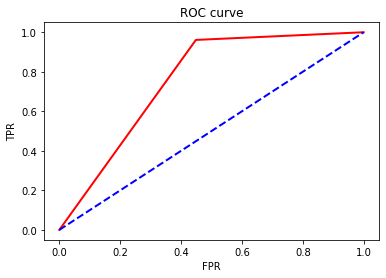

0.8431906687735223


In [57]:
###Confusion matrix with sklearn
from sklearn.metrics import roc_curve, roc_auc_score

##Computing false and true positive rates
fpr, tpr,_= roc_curve(y_test, y_pred, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()

##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print(roc_auc_score(logisticRegr.predict(x_test), y_test))

In [60]:
counter = 0
for pred, true, in zip(y_pred, y_test):
  if pred == False and true == True:
    print("False: " + labels_d[counter] + " and " + labels_f[counter])
    counter = counter + 1
  
  if counter == 20:
    break

False: d_nm0000108 and c_nm0000151
False: d_nm4029428 and c_nm5167146
False: d_nm4029428 and c_nm4289038
False: d_nm4029428 and c_nm4028680
False: d_nm4029428 and c_nm1395817
False: d_nm4028848 and c_nm9316956
False: d_nm4028848 and c_nm9316955
False: d_nm4028848 and c_nm9316954
False: d_nm4028848 and c_nm9316953
False: d_nm4028848 and c_nm4836961
False: d_nm4024940 and c_nm4500480
False: d_nm4024940 and c_nm4469134
False: d_nm4024940 and c_nm4468951
False: d_nm4024940 and c_nm4318511
False: d_nm4017355 and c_nm2837093
False: d_nm4017355 and c_nm2238815
False: d_nm4030793 and c_nm5258595
False: d_nm4017355 and c_nm1536605
False: d_nm4030793 and c_nm5258668
False: d_nm4030793 and c_nm5679766


In [61]:
counter = 0
for pred, true, in zip(y_pred, y_test):
  if pred == True and true == True:
    print("True: " + labels_d[counter] + " and " + labels_f[counter])
    counter = counter + 1
  
  if counter == 20:
    break

True: d_nm0000108 and c_nm0000151
True: d_nm4029428 and c_nm5167146
True: d_nm4029428 and c_nm4289038
True: d_nm4029428 and c_nm4028680
True: d_nm4029428 and c_nm1395817
True: d_nm4028848 and c_nm9316956
True: d_nm4028848 and c_nm9316955
True: d_nm4028848 and c_nm9316954
True: d_nm4028848 and c_nm9316953
True: d_nm4028848 and c_nm4836961
True: d_nm4024940 and c_nm4500480
True: d_nm4024940 and c_nm4469134
True: d_nm4024940 and c_nm4468951
True: d_nm4024940 and c_nm4318511
True: d_nm4017355 and c_nm2837093
True: d_nm4017355 and c_nm2238815
True: d_nm4030793 and c_nm5258595
True: d_nm4017355 and c_nm1536605
True: d_nm4030793 and c_nm5258668
True: d_nm4030793 and c_nm5679766


#  Not used because of very high hardware need

Because of very high hardware system need, I could not compiled these below codes!!!

In [64]:
###############################################################################
###############################################################################
### TRAIN
###############################################################################
###############################################################################

groupData = trainData.groupby('tconst')

listGroupData = list(groupData.groups)

edgesList = []

for eachMovie in listGroupData:
    oneGroup = groupData.get_group(eachMovie)
    if (oneGroup.category.str.contains(pat="actor").any() or oneGroup.category.str.contains(pat="actress").any()):
        if ((oneGroup.category.str.contains(pat="director").any())):
            for personIndex1, personRow1 in oneGroup.iterrows():
                checkValue1 = personRow1.category
                if(checkValue1 == "director"):
                    for personIndex2, personRow2 in oneGroup.iterrows():
                        checkValue2 = personRow2.category
                        if(checkValue2 == "actor" or checkValue2 == "actress"):
                            edgesList.append("d_" + personRow1.nconst + ",c_" + personRow2.nconst)

print(len(edgesList))

with open('general_network_links.txt', 'w') as f:
    for item in edgesList:
        f.write("%s\n" % item)

edgesData = pd.read_csv('general_network_links.txt', sep=',', header=None)
edgesData.columns = ["director", "movie_star"]

counted = edgesData.groupby(edgesData.columns.tolist()).size().reset_index().\
    rename(columns={0:'weight'})

counted = counted.sort_values(by="weight")

print("General Dataset: " + str(len(counted)))

left_list = counted.director.to_list()
right_list = counted.movie_star.to_list()
weight_list = counted.weight.to_list()

with open('edgelist.txt', 'w') as f:
    for item1, item2, item3 in zip(left_list, right_list, weight_list):
        f.write(item1 + " " + item2 + " " + str(item3) + "\n")

with open('left.txt', 'w') as f:
    for item in left_list:
        f.write("%s\n" % item)

with open('right.txt', 'w') as f:
    for item in right_list:
        f.write("%s\n" % item)
        
left = [line.rstrip('\n') for line in open("left.txt")]
right = [line.rstrip('\n') for line in open("right.txt")]

left = list(set(left))
right = list(set(right))

print("Right: " + str(len(right)) + " Left: " + str(len(left)))

edge_list = [line.rstrip('\n') for line in open("edgelist.txt")]

a_list = []

for elem in edge_list:
    a_list.append(tuple(elem.split(" ")))
    
graph = nx.Graph()
graph.add_nodes_from(right, bipartite=0)
graph.add_nodes_from(left, bipartite=1)

[graph.add_edge(x, y, weight=int(z)) for x, y, z in a_list]

print(nx.info(graph))
print("This network bipartite and weighted?")
print(nx.is_bipartite(graph))
print(nx.is_weighted(graph))

25078
General Dataset: 23718
Right: 15305 Left: 4329
Graph with 19634 nodes and 23718 edges
This network bipartite and weighted?
True
True


<ipython-input-64-d9480d1f8edf>:78: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


In [67]:
from node2vec import Node2Vec

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph, dimensions=6, walk_length=10, num_walks=3, workers=2, weight_key="weight")  # Use temp_folder for big graphs

Computing transition probabilities:   0%|          | 0/19634 [00:00<?, ?it/s]

In [68]:
# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [69]:
EMBEDDING_FILENAME = 'emb/train_embeddings.emb'
EMBEDDING_MODEL_FILENAME = 'emb/train_embeddings.model'

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

In [70]:
###############################################################################
###############################################################################
### VAL
###############################################################################
###############################################################################

groupData = trainData.groupby('tconst')

listGroupData = list(groupData.groups)

edgesList = []

for eachMovie in listGroupData:
    oneGroup = groupData.get_group(eachMovie)
    if (oneGroup.category.str.contains(pat="actor").any() or oneGroup.category.str.contains(pat="actress").any()):
        if ((oneGroup.category.str.contains(pat="director").any())):
            for personIndex1, personRow1 in oneGroup.iterrows():
                checkValue1 = personRow1.category
                if(checkValue1 == "director"):
                    for personIndex2, personRow2 in oneGroup.iterrows():
                        checkValue2 = personRow2.category
                        if(checkValue2 == "actor" or checkValue2 == "actress"):
                            edgesList.append("d_" + personRow1.nconst + ",c_" + personRow2.nconst)

print(len(edgesList))

with open('general_network_links.txt', 'w') as f:
    for item in edgesList:
        f.write("%s\n" % item)

edgesData = pd.read_csv('general_network_links.txt', sep=',', header=None)
edgesData.columns = ["director", "movie_star"]

counted = edgesData.groupby(edgesData.columns.tolist()).size().reset_index().\
    rename(columns={0:'weight'})

counted = counted.sort_values(by="weight")

print("General Dataset: " + str(len(counted)))

left_list = counted.director.to_list()
right_list = counted.movie_star.to_list()
weight_list = counted.weight.to_list()

with open('edgelist.txt', 'w') as f:
    for item1, item2, item3 in zip(left_list, right_list, weight_list):
        f.write(item1 + " " + item2 + " " + str(item3) + "\n")

with open('left.txt', 'w') as f:
    for item in left_list:
        f.write("%s\n" % item)

with open('right.txt', 'w') as f:
    for item in right_list:
        f.write("%s\n" % item)
        
left = [line.rstrip('\n') for line in open("left.txt")]
right = [line.rstrip('\n') for line in open("right.txt")]

left = list(set(left))
right = list(set(right))

print("Right: " + str(len(right)) + " Left: " + str(len(left)))

edge_list = [line.rstrip('\n') for line in open("edgelist.txt")]

a_list = []

for elem in edge_list:
    a_list.append(tuple(elem.split(" ")))
    
graph = nx.Graph()
graph.add_nodes_from(right, bipartite=0)
graph.add_nodes_from(left, bipartite=1)

[graph.add_edge(x, y, weight=int(z)) for x, y, z in a_list]

print(nx.info(graph))
print("This network bipartite and weighted?")
print(nx.is_bipartite(graph))
print(nx.is_weighted(graph))

25078
General Dataset: 23718
Right: 15305 Left: 4329
Graph with 19634 nodes and 23718 edges
This network bipartite and weighted?
True
True


<ipython-input-70-9aea61f5c7e1>:78: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


In [71]:
from node2vec import Node2Vec

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph, dimensions=6, walk_length=10, num_walks=3, workers=2, weight_key="weight")  # Use temp_folder for big graphs

Computing transition probabilities:   0%|          | 0/19634 [00:00<?, ?it/s]

In [72]:
# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [73]:
EMBEDDING_FILENAME = 'emb/val_embeddings.emb'
EMBEDDING_MODEL_FILENAME = 'emb/val_embeddings.model'

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

In [74]:
###############################################################################
###############################################################################
### TEST
###############################################################################
###############################################################################

groupData = trainData.groupby('tconst')

listGroupData = list(groupData.groups)

edgesList = []

for eachMovie in listGroupData:
    oneGroup = groupData.get_group(eachMovie)
    if (oneGroup.category.str.contains(pat="actor").any() or oneGroup.category.str.contains(pat="actress").any()):
        if ((oneGroup.category.str.contains(pat="director").any())):
            for personIndex1, personRow1 in oneGroup.iterrows():
                checkValue1 = personRow1.category
                if(checkValue1 == "director"):
                    for personIndex2, personRow2 in oneGroup.iterrows():
                        checkValue2 = personRow2.category
                        if(checkValue2 == "actor" or checkValue2 == "actress"):
                            edgesList.append("d_" + personRow1.nconst + ",c_" + personRow2.nconst)

print(len(edgesList))

with open('general_network_links.txt', 'w') as f:
    for item in edgesList:
        f.write("%s\n" % item)

edgesData = pd.read_csv('general_network_links.txt', sep=',', header=None)
edgesData.columns = ["director", "movie_star"]

counted = edgesData.groupby(edgesData.columns.tolist()).size().reset_index().\
    rename(columns={0:'weight'})

counted = counted.sort_values(by="weight")

print("General Dataset: " + str(len(counted)))

left_list = counted.director.to_list()
right_list = counted.movie_star.to_list()
weight_list = counted.weight.to_list()

with open('edgelist.txt', 'w') as f:
    for item1, item2, item3 in zip(left_list, right_list, weight_list):
        f.write(item1 + " " + item2 + " " + str(item3) + "\n")

with open('left.txt', 'w') as f:
    for item in left_list:
        f.write("%s\n" % item)

with open('right.txt', 'w') as f:
    for item in right_list:
        f.write("%s\n" % item)
        
left = [line.rstrip('\n') for line in open("left.txt")]
right = [line.rstrip('\n') for line in open("right.txt")]

left = list(set(left))
right = list(set(right))

print("Right: " + str(len(right)) + " Left: " + str(len(left)))

edge_list = [line.rstrip('\n') for line in open("edgelist.txt")]

a_list = []

for elem in edge_list:
    a_list.append(tuple(elem.split(" ")))
    
graph = nx.Graph()
graph.add_nodes_from(right, bipartite=0)
graph.add_nodes_from(left, bipartite=1)

[graph.add_edge(x, y, weight=int(z)) for x, y, z in a_list]

print(nx.info(graph))
print("This network bipartite and weighted?")
print(nx.is_bipartite(graph))
print(nx.is_weighted(graph))

25078
General Dataset: 23718
Right: 15305 Left: 4329
Graph with 19634 nodes and 23718 edges
This network bipartite and weighted?
True
True


<ipython-input-74-3e35f2df9d44>:78: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


In [75]:
from node2vec import Node2Vec

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph, dimensions=6, walk_length=10, num_walks=3, workers=2, weight_key="weight")  # Use temp_folder for big graphs

Computing transition probabilities:   0%|          | 0/19634 [00:00<?, ?it/s]

In [76]:
# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [77]:
EMBEDDING_FILENAME = 'emb/test_embeddings.emb'
EMBEDDING_MODEL_FILENAME = 'emb/test_embeddings.model'

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

In [78]:
# Load saved embeddings in Google Drive.
model_train = gensim.models.KeyedVectors.load_word2vec_format("emb/train_embeddings.emb", binary=False)
model_val = gensim.models.KeyedVectors.load_word2vec_format("emb/val_embeddings.emb", binary=False)
model_test = gensim.models.KeyedVectors.load_word2vec_format("emb/test_embeddings.emb", binary=False)

In [ ]:
# Embed edges using Hadamard method
from node2vec.edges import HadamardEmbedder

edges_embs_train = HadamardEmbedder(keyed_vectors=model_train)
edges_embs_val   = HadamardEmbedder(keyed_vectors=model_val)
edges_embs_test  = HadamardEmbedder(keyed_vectors=model_test)

# Get all edges in a separate KeyedVectors instance - use with caution could be huge for big networks
edges_kv_train   = edges_embs_train.as_keyed_vectors()
edges_kv_val     = edges_embs_val.as_keyed_vectors()
edges_kv_test    = edges_embs_test.as_keyed_vectors()

EDGES_EMBEDDING_FILENAME_TRAIN = "result/IMDB_TRAIN.txt"
EDGES_EMBEDDING_FILENAME_VAL   = "result/IMDB_VAL.txt"
EDGES_EMBEDDING_FILENAME_TEST  = "result/IMDB_TEST.txt"

# Save embeddings for later use
edges_kv_train.save_word2vec_format(EDGES_EMBEDDING_FILENAME_TRAIN)
edges_kv_val.save_word2vec_format(EDGES_EMBEDDING_FILENAME_VAL)
edges_kv_test.save_word2vec_format(EDGES_EMBEDDING_FILENAME_TEST)

Generating edge features:  37%|███▋      | 70837520/192756795.0 [07:15<12:23, 164040.74it/s]